<img src="https://devra.ai/analyst/notebook/2722/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Student Stress Analysis and Prediction Notebook</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

Our journey begins with a fascination for the complex interplay of factors contributing to student stress. If you find our insights useful, please upvote this notebook. We promise our analysis is as dry as a desert—yet surprisingly refreshing.

## Table of Contents

1. [Data Import](#Data-Import)
2. [Data Exploration](#Data-Exploration)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Visualizations and Exploratory Data Analysis](#Visualizations-and-Exploratory-Data-and-Exploratory-Analysis)
5. [Predictive Modeling](#Predictive-Modeling)
6. [Summary and Future Work](#Summary-and-Future-Work)

In [1]:
# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib
matplotlib.use('Agg')  # Ensure non-interactive backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is imported
%matplotlib inline
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set seaborn style for better visuals
sns.set(style='whitegrid')

print('Libraries imported and configurations set.')

Libraries imported and configurations set.


## Data Import

We import two datasets capturing various dimensions of student stress. One covers a broad range of potential stress indicators while the other provides additional context regarding demographics and behavioral aspects.

In [2]:
# Load the first dataset: StressLevelDataset.csv
stress_df1 = pd.read_csv('/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv', 
                          delimiter=',', encoding='ascii')

# Load the second dataset: Stress_Dataset.csv
stress_df2 = pd.read_csv('/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv', 
                          delimiter=',', encoding='ascii')

print('Datasets loaded successfully.')

# Display the first few rows of each dataframe
print('First few rows of StressLevelDataset:')
print(stress_df1.head())

print('\nFirst few rows of Stress_Dataset:')
print(stress_df2.head())

Datasets loaded successfully.
First few rows of StressLevelDataset:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_perfo

## Data Exploration

Before diving into heavy analysis, it is important to understand our data. Let us inspect the datasets for missing values, basic statistics, and overall structures. Remember: knowing your data is half the battle.

In [3]:
# Display basic information and statistics for StressLevelDataset
print('StressLevelDataset info:')
stress_df1.info()

print('\nDescriptive statistics for StressLevelDataset:')
print(stress_df1.describe())

# Check for missing values in StressLevelDataset
print('\nMissing values in StressLevelDataset:')
print(stress_df1.isnull().sum())

# Display information for Stress_Dataset
print('\nStress_Dataset info:')
stress_df2.info()

print('\nDescriptive statistics for Stress_Dataset:')
print(stress_df2.describe(include='all'))

# Check for missing values in Stress_Dataset
print('\nMissing values in Stress_Dataset:')
print(stress_df2.isnull().sum())

StressLevelDataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_lo

## Data Cleaning and Preprocessing

Data rarely comes perfectly packaged. In this section, we handle duplicate columns and other common issues. For instance, the second dataset contains duplicate questions with a trailing '.1'. We resolve this by dropping the duplicate column. This method is critical and can be reused by others encountering similar quirks in their datasets.

In [4]:
# Identify and drop duplicate columns in stress_df2 (e.g., duplicate question)
duplicate_columns = [col for col in stress_df2.columns if '.1' in col]
if duplicate_columns:
    print(f'Dropping duplicate columns: {duplicate_columns}')
    stress_df2.drop(columns=duplicate_columns, inplace=True)
else:
    print('No duplicate columns found in Stress_Dataset.')

# Reset indices if necessary and show the new column headers
stress_df2.reset_index(drop=True, inplace=True)
print('Columns in Stress_Dataset after cleaning:')
print(stress_df2.columns.tolist())

Dropping duplicate columns: ['Have you been dealing with anxiety or tension recently?.1']
Columns in Stress_Dataset after cleaning:
['Gender', 'Age', 'Have you recently experienced stress in your life?', 'Have you noticed a rapid heartbeat or palpitations?', 'Have you been dealing with anxiety or tension recently?', 'Do you face any sleep problems or difficulties falling asleep?', 'Have you been getting headaches more often than usual?', 'Do you get irritated easily?', 'Do you have trouble concentrating on your academic tasks?', 'Have you been feeling sadness or low mood?', 'Have you been experiencing any illness or health issues?', 'Do you often feel lonely or isolated?', 'Do you feel overwhelmed with your academic workload?', 'Are you in competition with your peers, and does it affect you?', 'Do you find that your relationship often causes you stress?', 'Are you facing any difficulties with your professors or instructors?', 'Is your working environment unpleasant or stressful?', 'Do 

## Visualizations and Exploratory Data Analysis

In this section, we apply several visualization techniques in order to understand relationships and distributions in the data. From heatmaps to pair plots and strip plots, we aim to present a comprehensive picture of the stress factors. A picture is worth a thousand numbers.

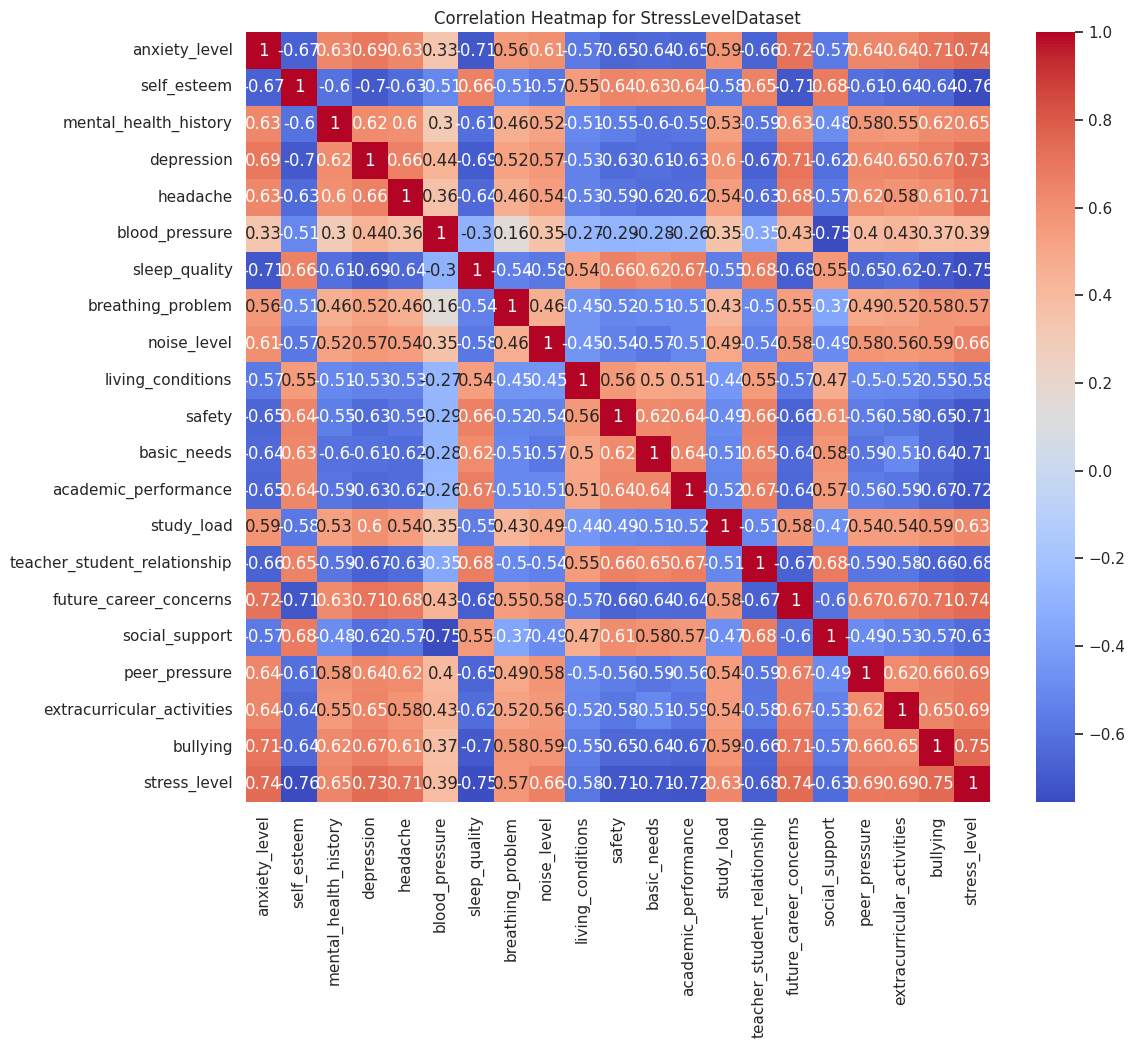

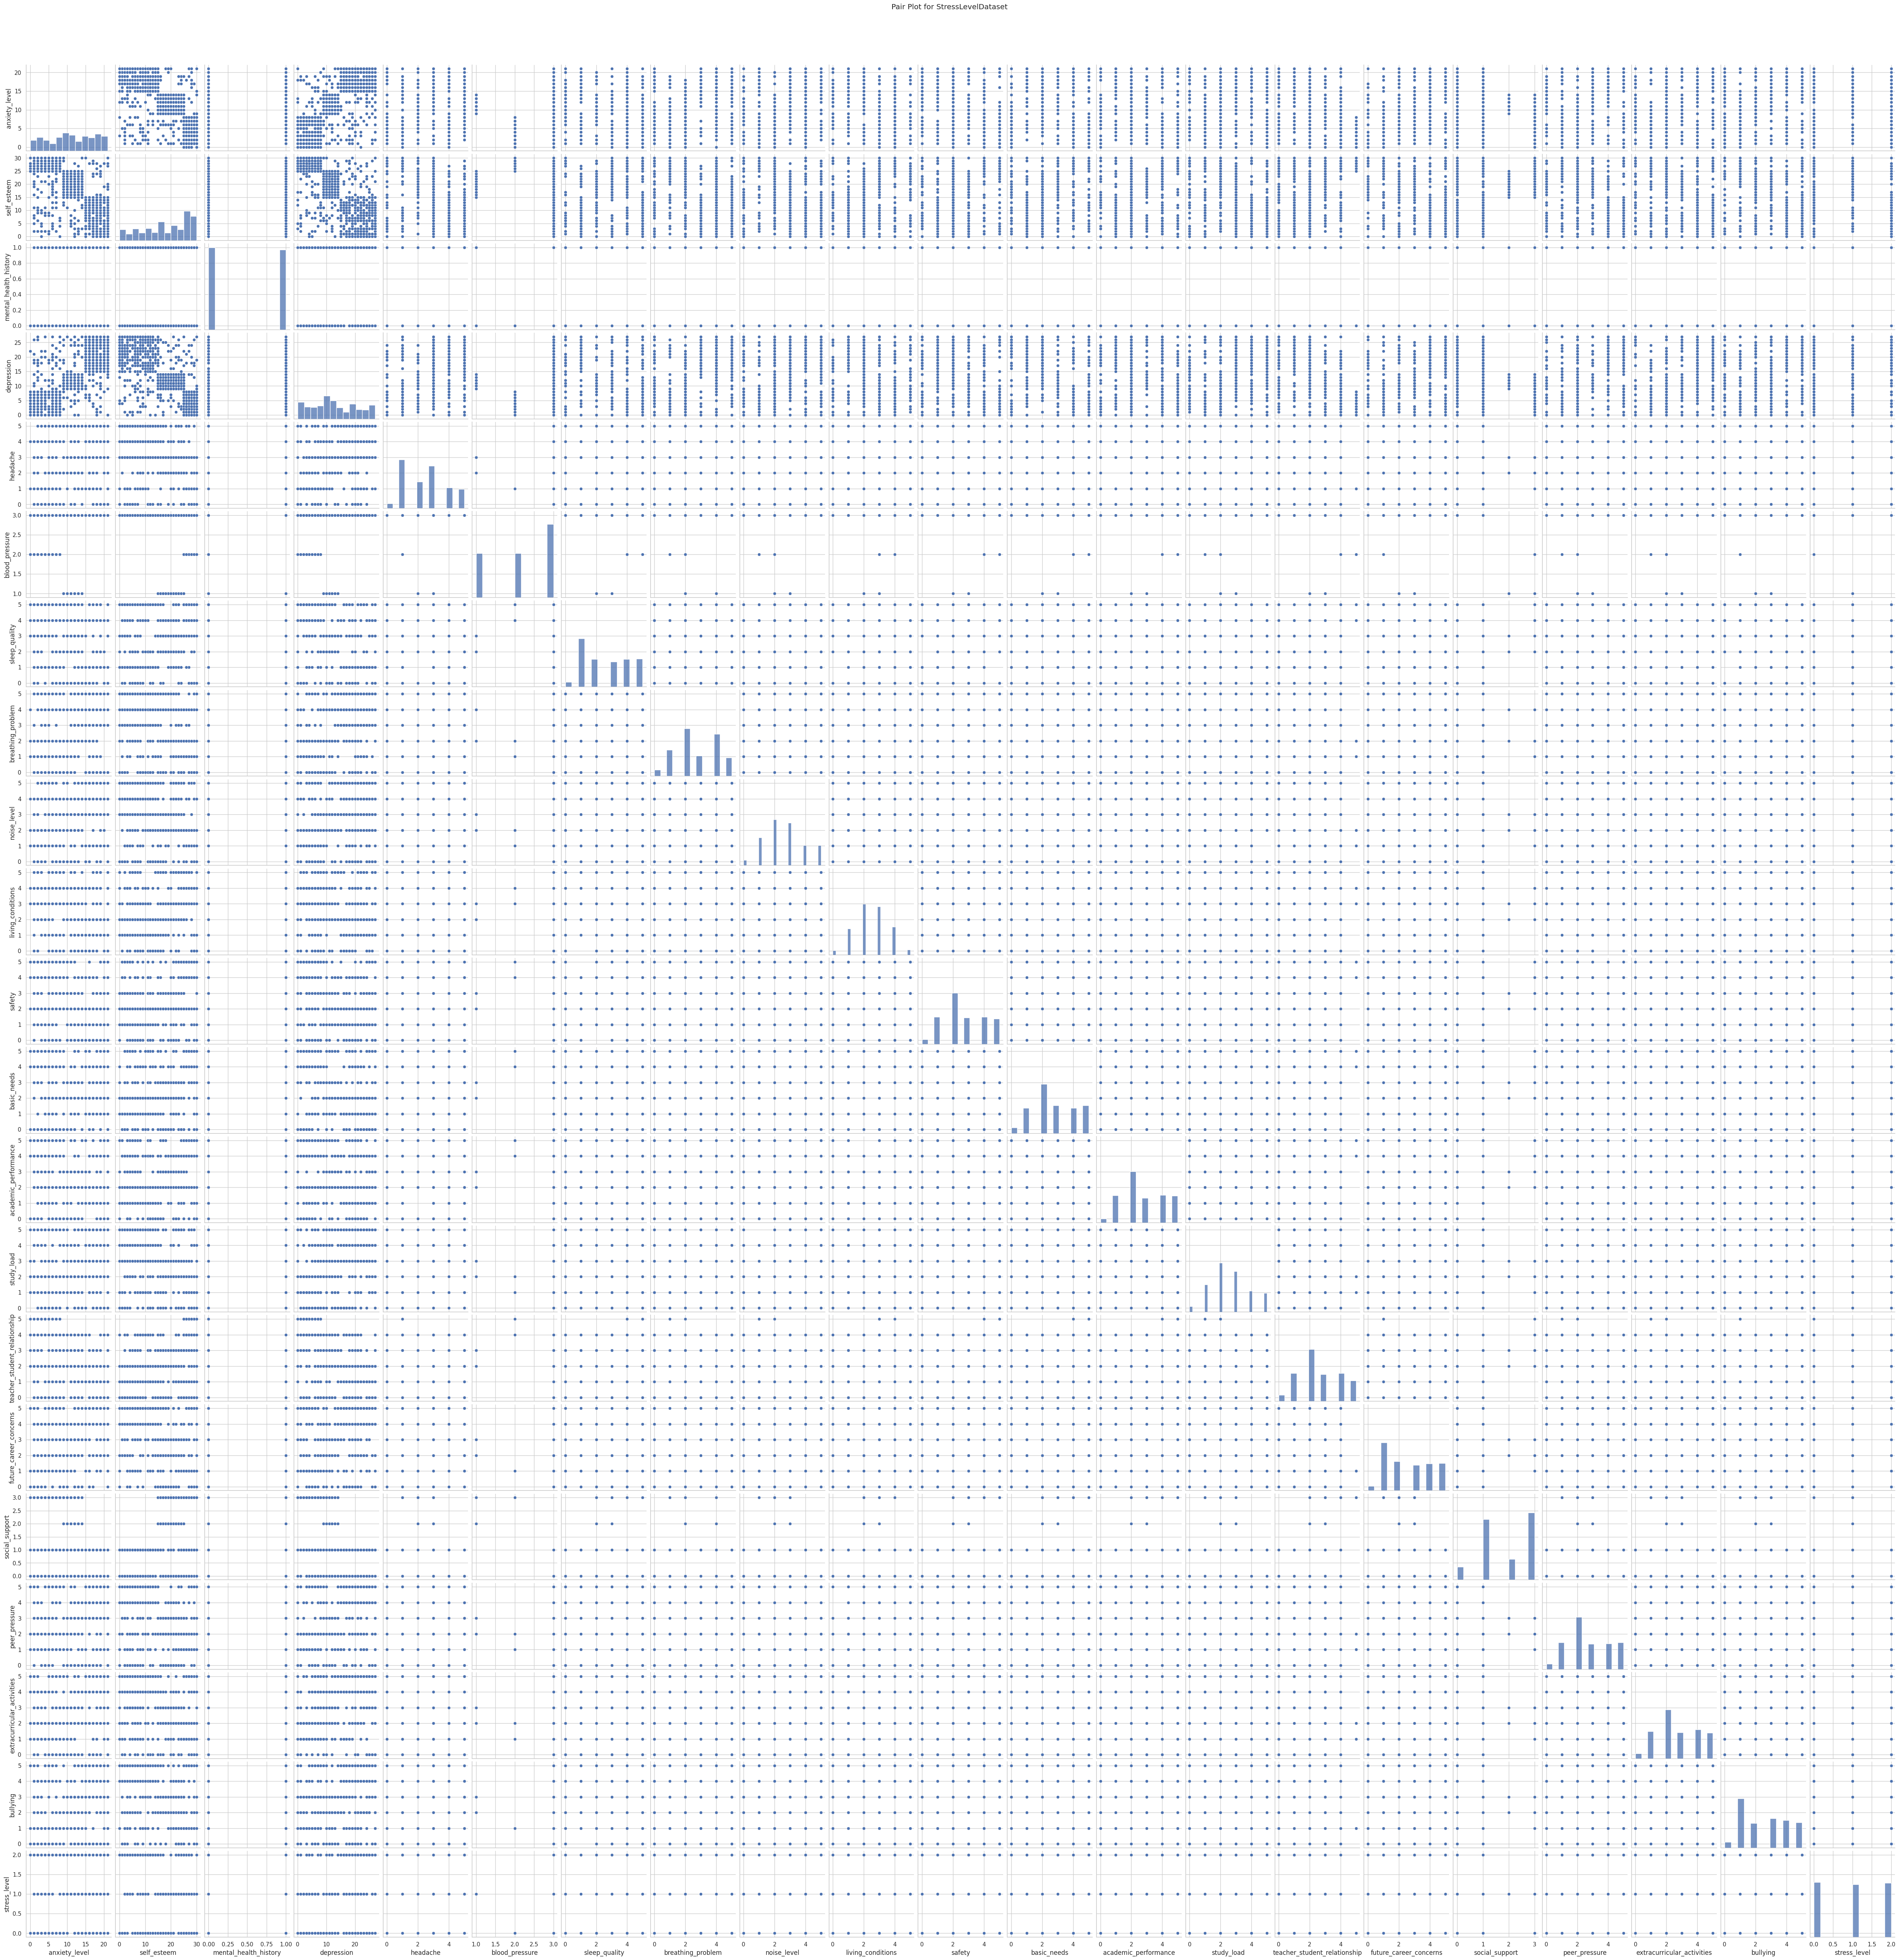

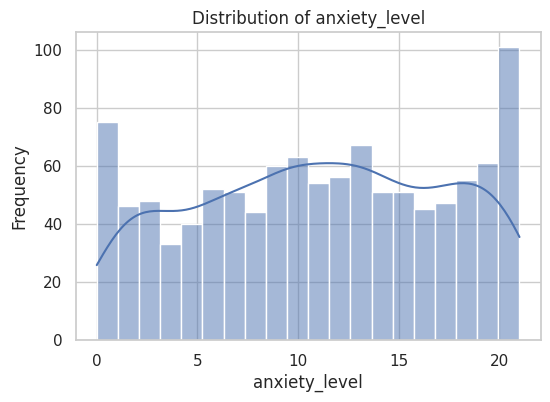

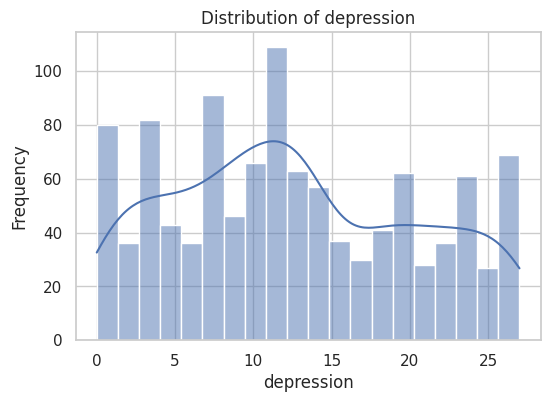

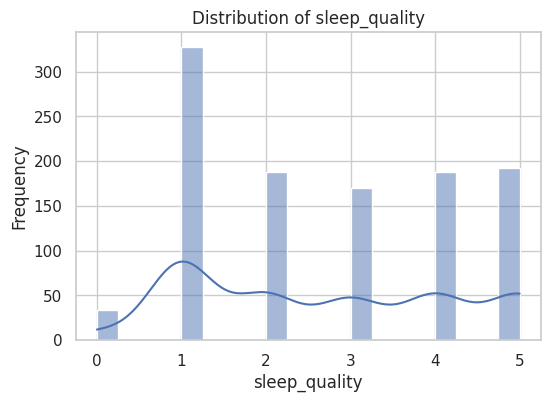

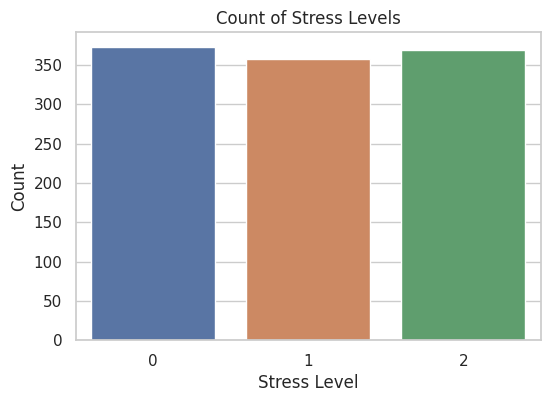

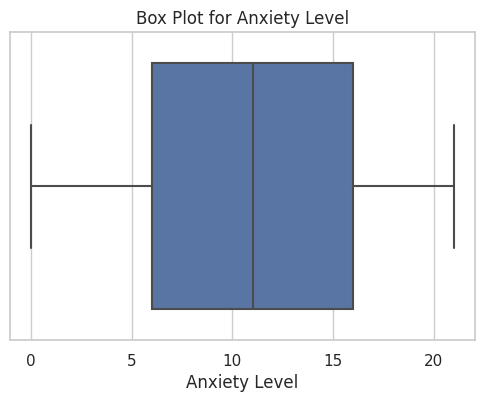

In [5]:
# Visualization for StressLevelDataset

# Select only numeric columns
numeric_df = stress_df1.select_dtypes(include=[np.number])

# Check if there are at least 4 numeric columns to produce a correlation heatmap
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(12,10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap for StressLevelDataset')
    plt.show()
else:
    print('Not enough numeric columns for correlation heatmap.')

# Pair Plot
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot for StressLevelDataset', y=1.02)
plt.show()

# Histogram for a selection of features
features_to_plot = ['anxiety_level', 'depression', 'sleep_quality']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(stress_df1[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Count Plot (akin to a pie chart for categorical distributions) for stress_level
plt.figure(figsize=(6,4))
sns.countplot(x='stress_level', data=stress_df1)
plt.title('Count of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# Box Plot for anxiety_level
plt.figure(figsize=(6,4))
sns.boxplot(x=stress_df1['anxiety_level'])
plt.title('Box Plot for Anxiety Level')
plt.xlabel('Anxiety Level')
plt.show()

## Predictive Modeling

Using the StressLevelDataset, we build a predictor for the stress level. In our case, we deploy a Random Forest Classifier to predict the target variable. The performance is evaluated using the accuracy score and a confusion matrix to assess misclassifications. This step is key if the data implies that predictions could guide interventions.

Prediction Accuracy: 0.8727


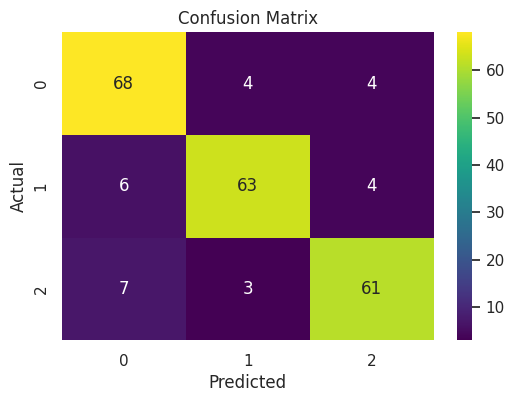

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



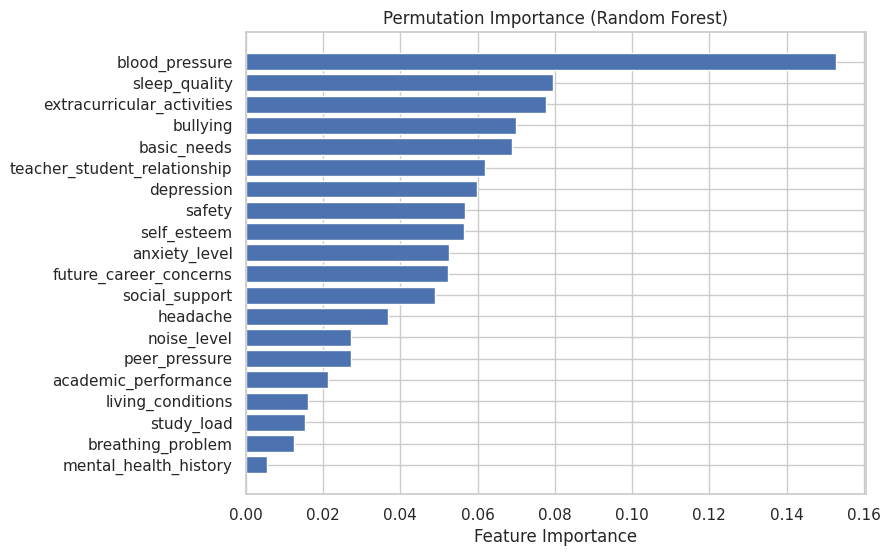

In [6]:
# Prepare the data for modeling
target = 'stress_level'
features = stress_df1.columns.drop(target)

X = stress_df1[features]
y = stress_df1[target]

# Split into training and testing datasets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.4f}')

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Permutation Importance (a rough barh plot using feature importances from the Random Forest)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Permutation Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

## Summary and Future Work

In this notebook, we imported and explored two student stress datasets, performed comprehensive data cleaning, and employed a variety of visualizations to inspect the data. We then built a predictor using a Random Forest Classifier with promising accuracy. 

Merits of this approach include a systematic process starting from exploratory data analysis to modeling that can be iteratively refined. In future analyses, one could explore feature engineering, hyperparameter tuning, and more advanced ensemble methods. Additionally, exploring the second dataset further with techniques such as grouped barplots and violin plots could yield deeper insights into the behavioural aspects of stress.

If this notebook helps you understand student stress factors better, please consider upvoting.